# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Reading the Dataset

In [2]:
data=pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,st_depression,slope,num_vessels,Thalassemia,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


# Preprocessing of the data

In [4]:
data.shape

(1025, 14)

In [5]:
data.describe()

,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,st_depression,slope,num_vessels,Thalassemia,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   1025 non-null   int64  
 1   sex                                   1025 non-null   int64  
 2   Chest_Pain_Type                       1025 non-null   int64  
 3   Resting_Blood_Pressure                1025 non-null   int64  
 4   Serum_Cholesterol                     1025 non-null   int64  
 5   Fasting_Blood_Sugar                   1025 non-null   int64  
 6   Resting_Electrocardiographic_Results  1025 non-null   int64  
 7   Maximum_Heart_Rate_Achieved           1025 non-null   int64  
 8   Exercise_Induced_Angina               1025 non-null   int64  
 9   st_depression                         1025 non-null   float64
 10  slope                                 1025 non-null   int64  
 11  num_vessels      

In [7]:
#checking for missing_values
missing_values=data.isnull().sum()
missing_values

,0
age,0
sex,0
Chest_Pain_Type,0
Resting_Blood_Pressure,0
Serum_Cholesterol,0
Fasting_Blood_Sugar,0
Resting_Electrocardiographic_Results,0
Maximum_Heart_Rate_Achieved,0
Exercise_Induced_Angina,0
st_depression,0


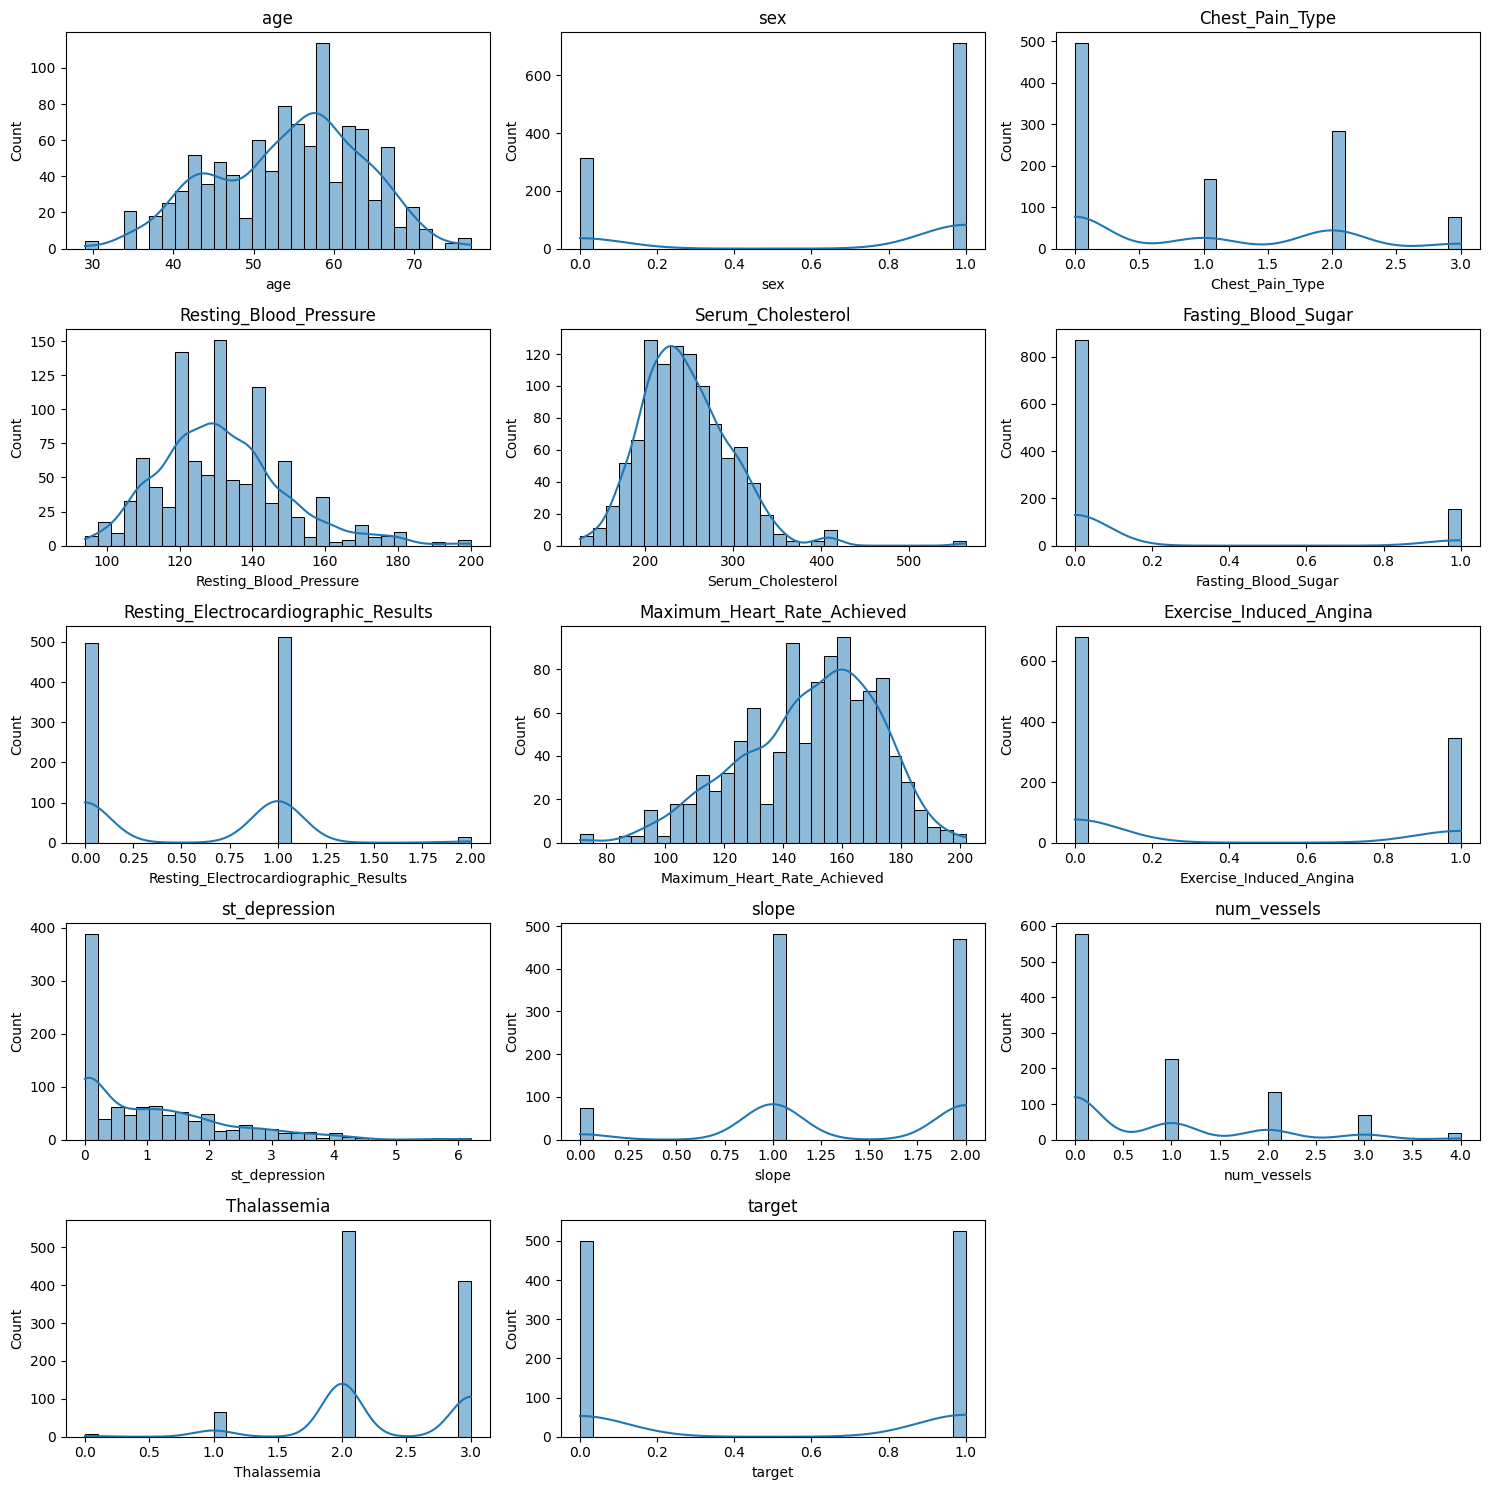

In [23]:
plt.figure(figsize=(15, 15))
for i, feature in enumerate(data.select_dtypes(include='number').columns):
    plt.subplot(5, 3, i+1)
    sns.histplot(data=data, x=feature, bins=30, kde=True)
    plt.title(feature)
plt.tight_layout()

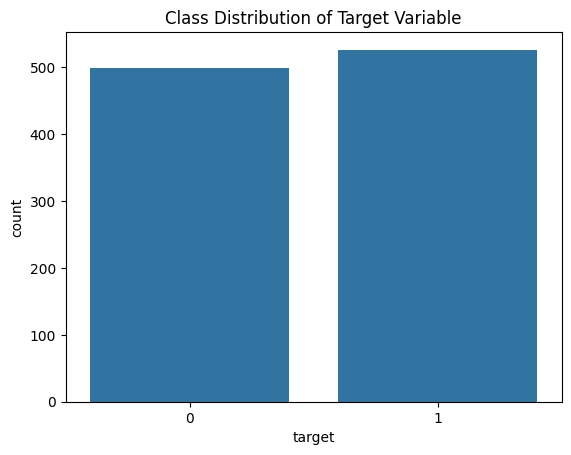

In [8]:
# Check the distribution of the target variable/data inbalance
sns.countplot(x='target', data=data)
plt.title("Class Distribution of Target Variable")
plt.show()


## Correlation Matrix and Heatmap

In [9]:
# Correlation matrix
correlation_matrix = data.corr()
correlation_matrix


,age,sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholesterol,Fasting_Blood_Sugar,Resting_Electrocardiographic_Results,Maximum_Heart_Rate_Achieved,Exercise_Induced_Angina,st_depression,slope,num_vessels,Thalassemia,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
Chest_Pain_Type,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
Resting_Blood_Pressure,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
Serum_Cholesterol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
Fasting_Blood_Sugar,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
Resting_Electrocardiographic_Results,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
Maximum_Heart_Rate_Achieved,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
Exercise_Induced_Angina,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
st_depression,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


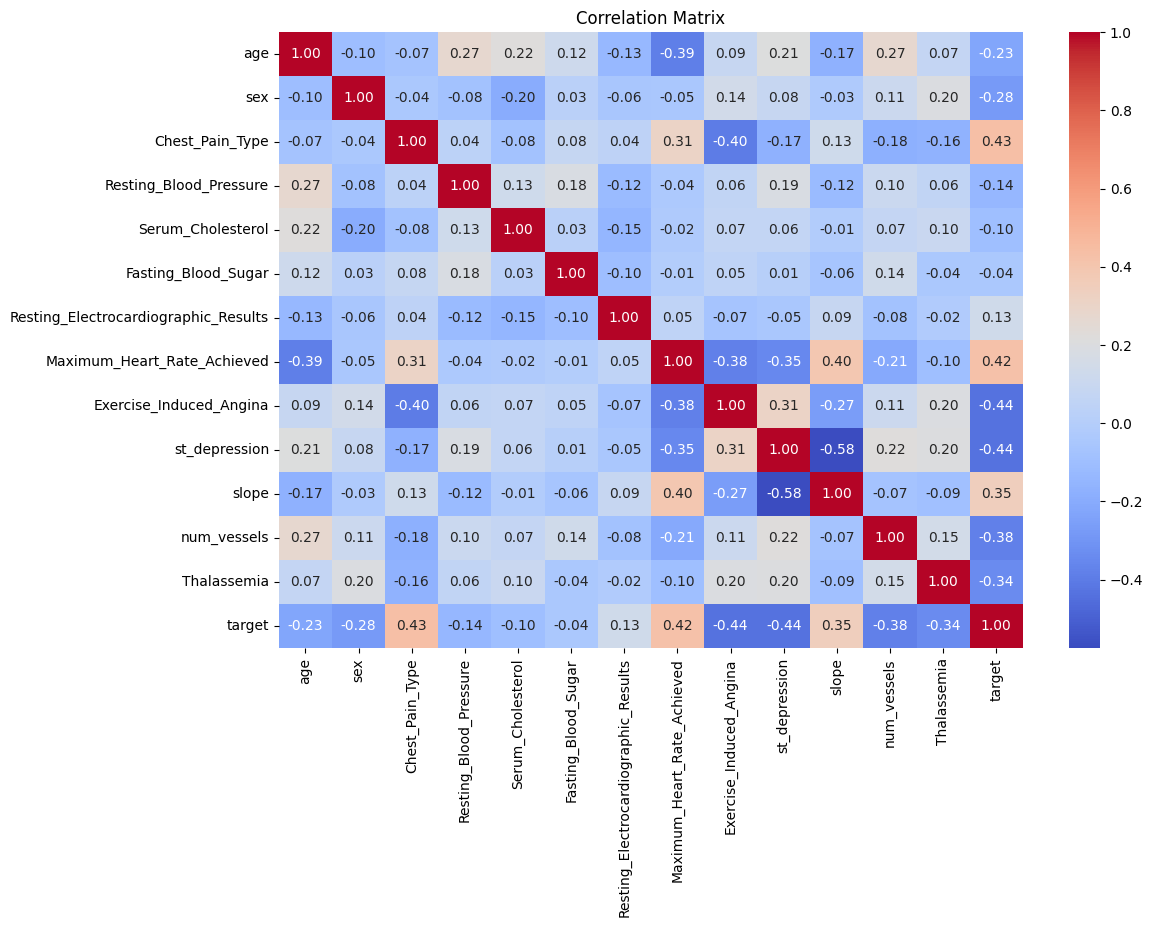

In [10]:
# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


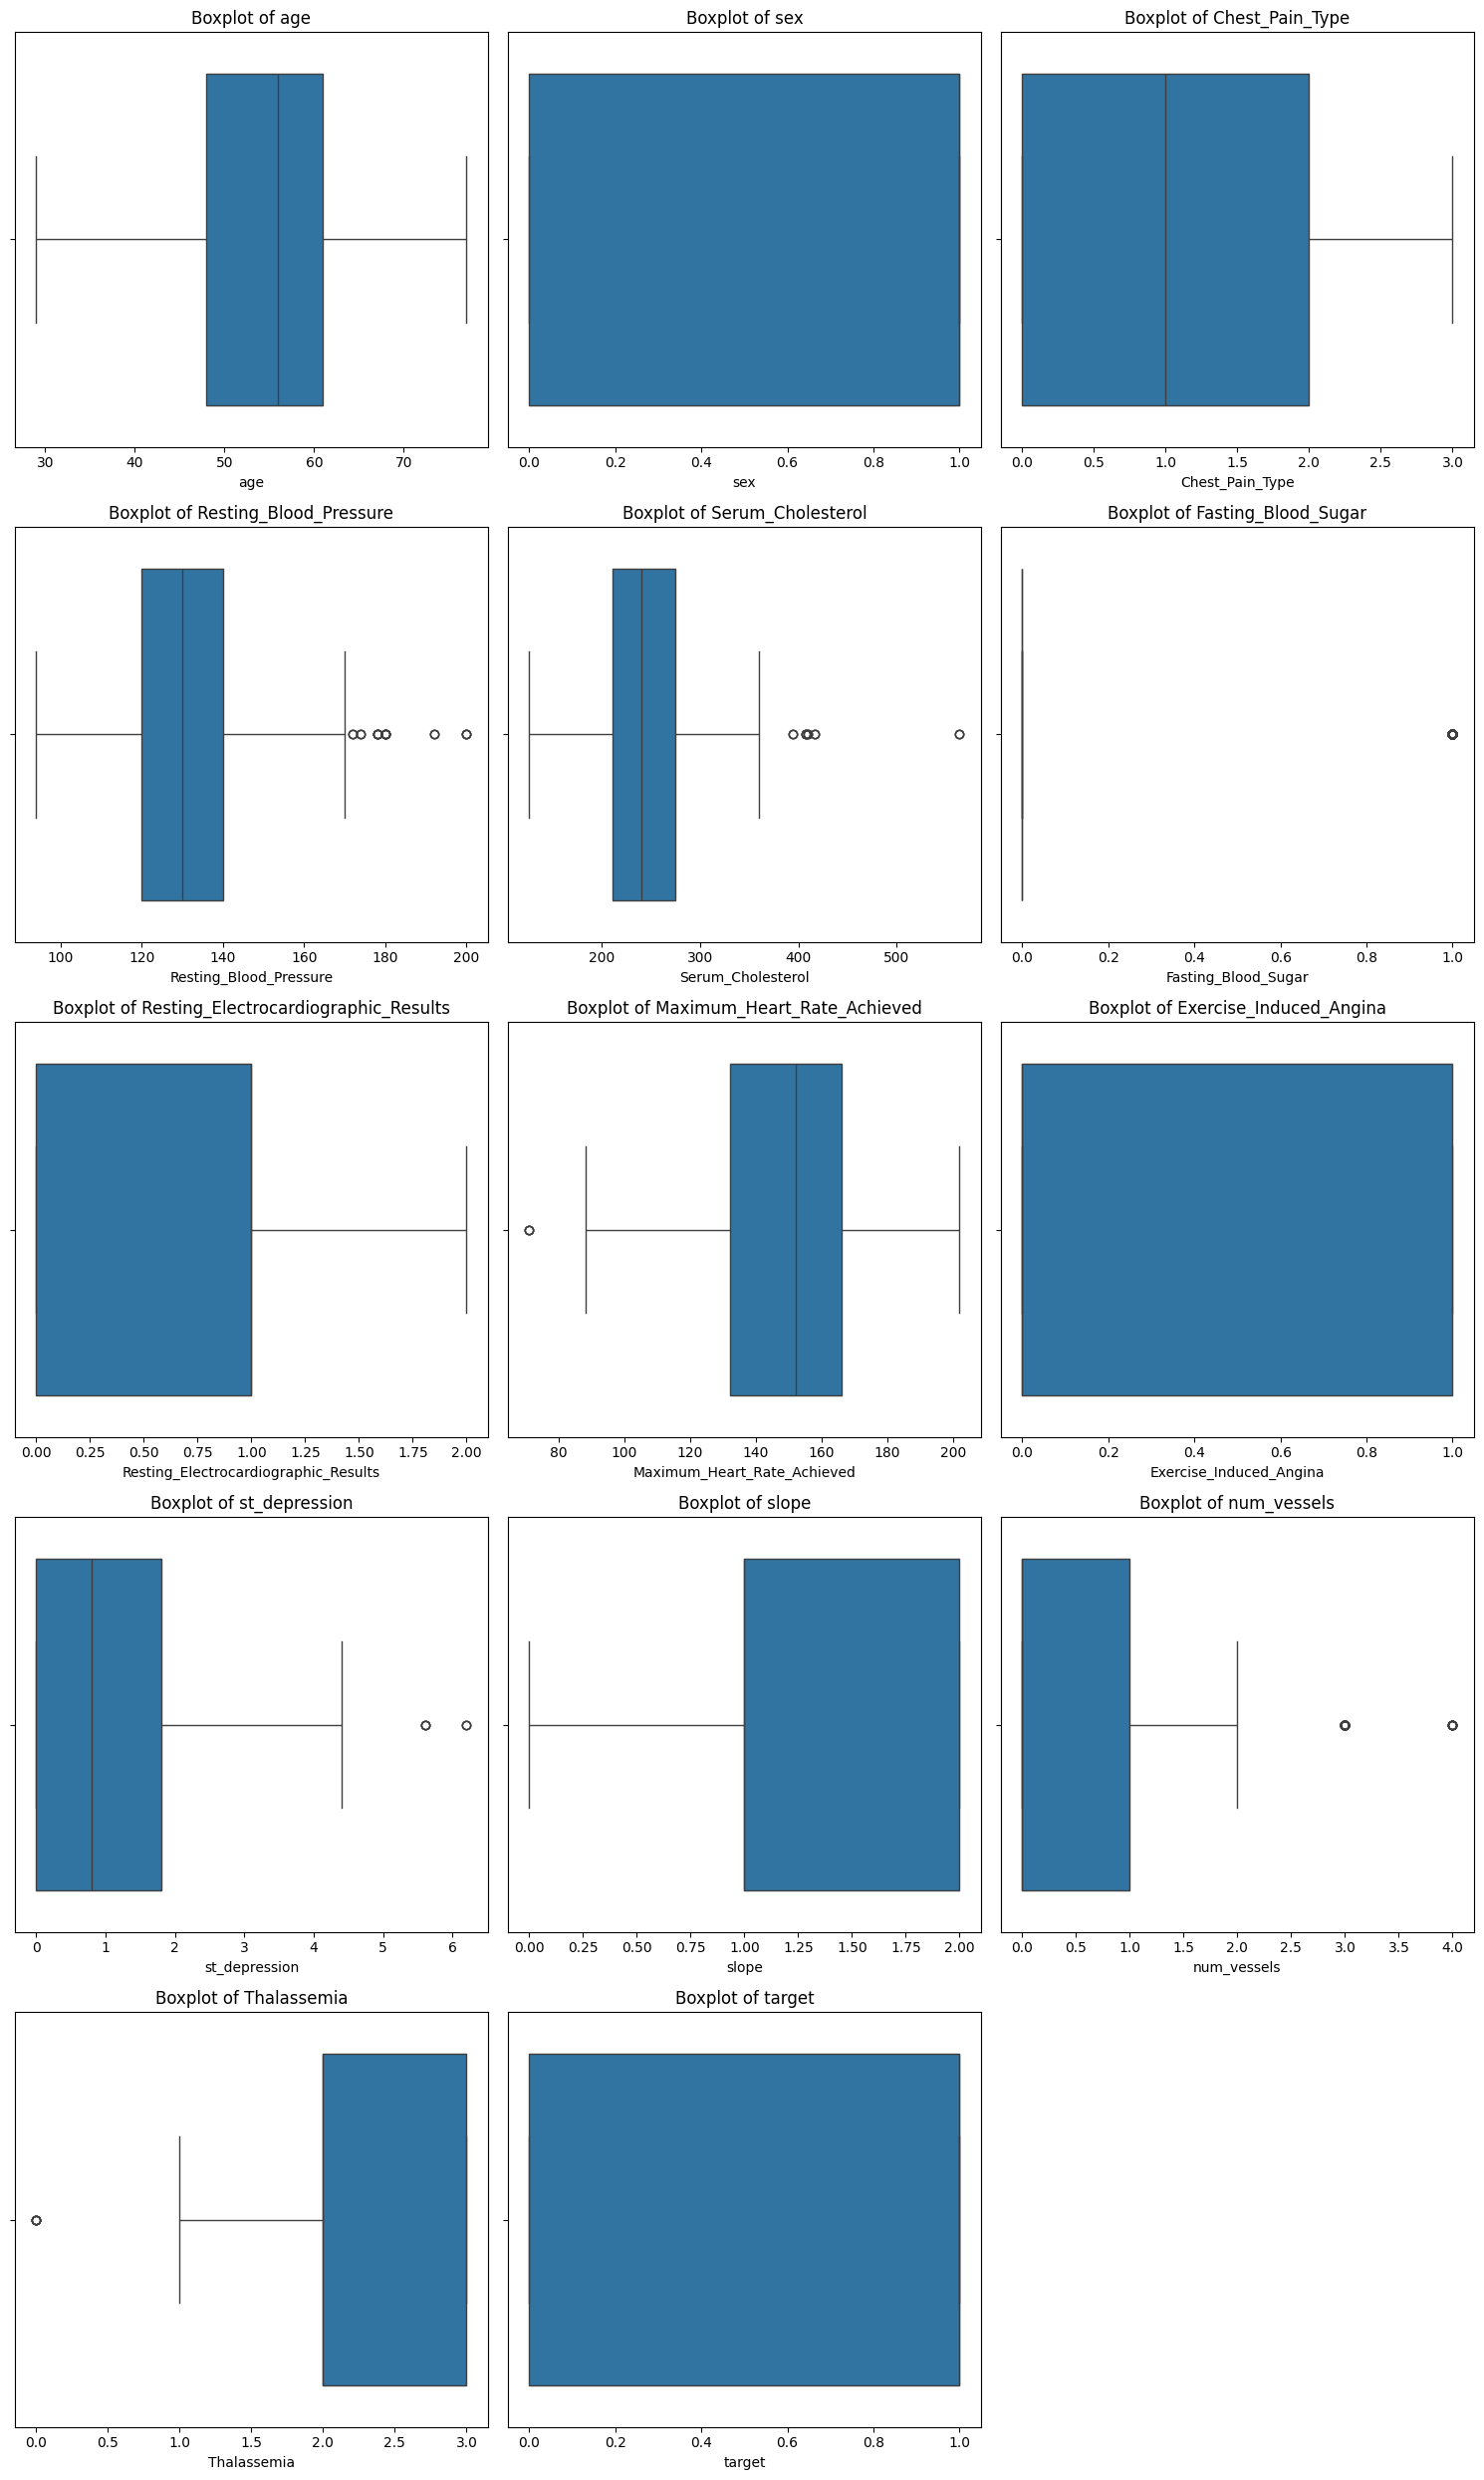

In [25]:
# Boxplot for each feature to check for outliers
numeric_columns = data.select_dtypes(include=[np.number]).columns

# Calculate the number of rows and columns needed for the boxplots
num_columns = 3  # Number of columns in the subplot grid
num_rows = int(np.ceil(len(numeric_columns) / num_columns))  # Calculate the number of rows required

plt.figure(figsize=(15, 5 * num_rows))  # Adjust the figure size dynamically
for i, column in enumerate(numeric_columns):
    plt.subplot(num_rows, num_columns, i + 1)  # Adjust layout based on number of numeric columns
    sns.boxplot(x=data[column])
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()



### Number of people who have heart attack vs age

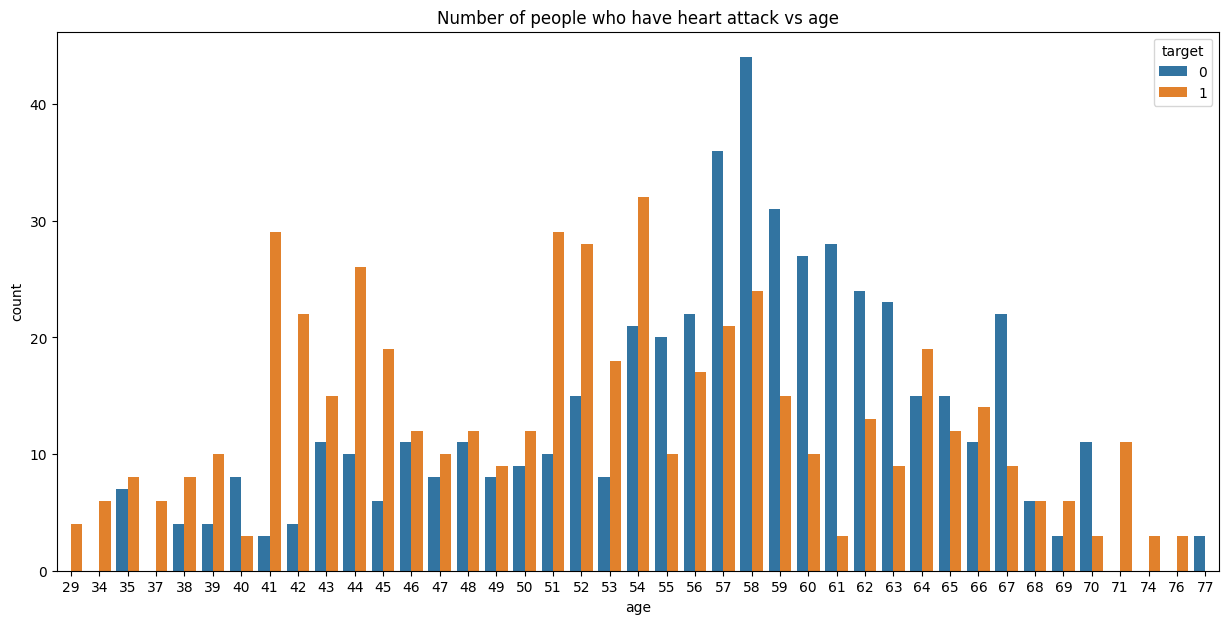

In [21]:
plt.figure(figsize=(15,7))
sns.countplot(x='age', hue='target', data=data)
plt.title("Number of people who have heart attack vs age")
plt.show()

### Number of people who have heart attack vs sex

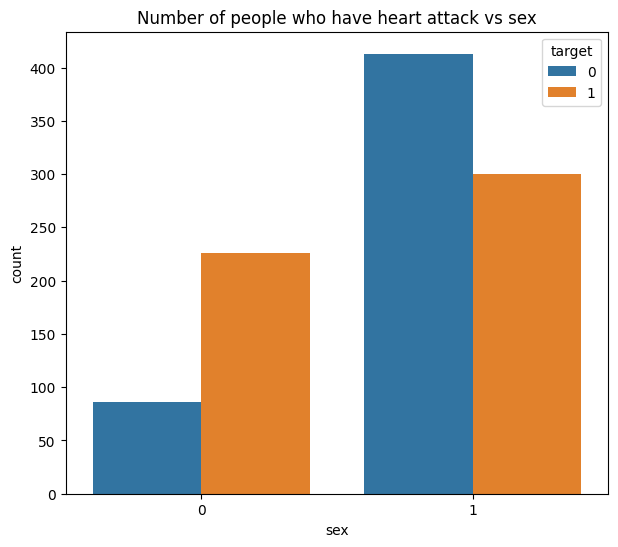

In [22]:
plt.figure(figsize=(7, 6))
sns.countplot(x='sex', hue='target', data=data)
plt.title("Number of people who have heart attack vs sex")
plt.show()

### Spliting the Data

In [12]:
X = data.drop('target', axis=1)  # Features
y = data['target']  # Target

In [13]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Scaling

In [14]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Applying Models
    - Logistic Regression
    - SVM
    -Random Forest

In [15]:
log_reg = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier(n_estimators=100, random_state=42)


In [16]:
# Train models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
# Predict using all models
y_pred_log_reg = log_reg.predict(X_test)
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)


## Models Evaluation

In [18]:
# Evaluate models
def evaluate_model(model_name, y_test, y_pred):
    print(f"--- {model_name} ---")
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}")
    print("\n")
    # Evaluate all models
evaluate_model("Logistic Regression", y_test, y_pred_log_reg)
evaluate_model("SVM", y_test, y_pred_svm)
evaluate_model("Random Forest", y_test, y_pred_rf)

--- Logistic Regression ---
Accuracy: 0.7951219512195122
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205

Confusion Matrix:
[[73 29]
 [13 90]]


--- SVM ---
Accuracy: 0.8878048780487805
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       102
           1       0.85      0.94      0.89       103

    accuracy                           0.89       205
   macro avg       0.89      0.89      0.89       205
weighted avg       0.89      0.89      0.89       205

Confusion Matrix:
[[85 17]
 [ 6 97]]


--- Random Forest ---
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   supp

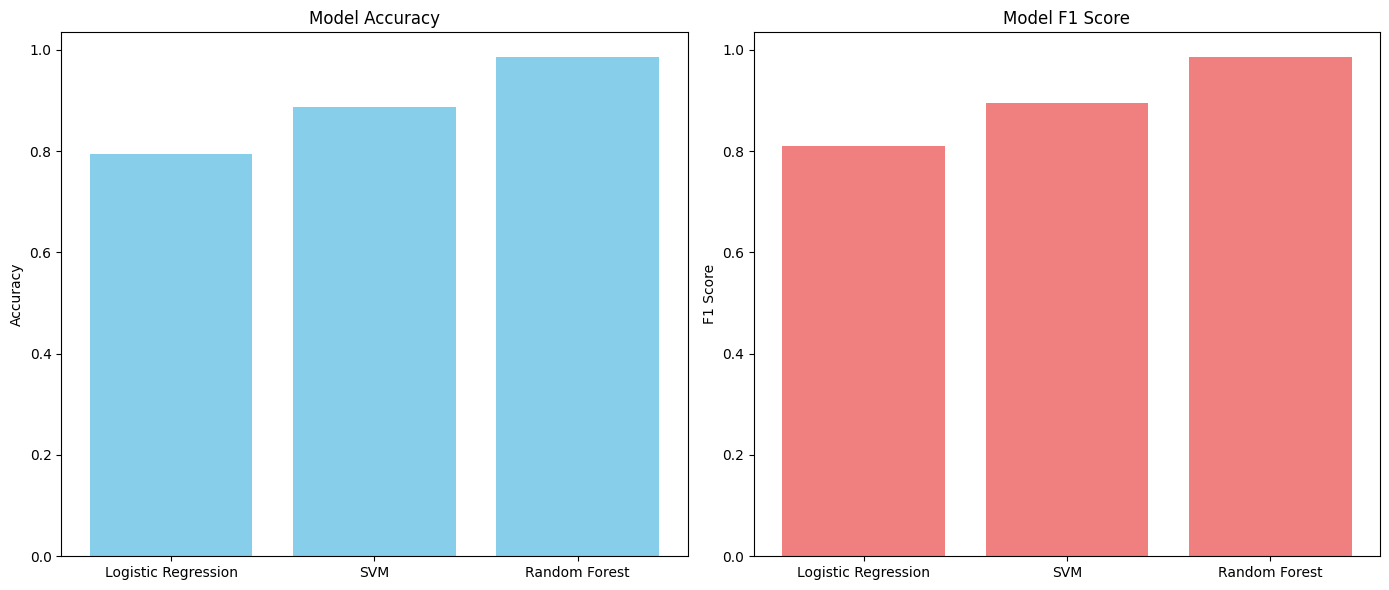

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Function to evaluate models and store metrics
def evaluate_and_store_metrics(model_name, y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, f1

# Store metrics for all models
models = ['Logistic Regression', 'SVM', 'Random Forest']
accuracies = []
f1_scores = []

# Evaluate Logistic Regression
accuracy_log_reg, f1_log_reg = evaluate_and_store_metrics("Logistic Regression", y_test, y_pred_log_reg)
accuracies.append(accuracy_log_reg)
f1_scores.append(f1_log_reg)

# Evaluate SVM
accuracy_svm, f1_svm = evaluate_and_store_metrics("SVM", y_test, y_pred_svm)
accuracies.append(accuracy_svm)
f1_scores.append(f1_svm)

# Evaluate Random Forest
accuracy_rf, f1_rf = evaluate_and_store_metrics("Random Forest", y_test, y_pred_rf)
accuracies.append(accuracy_rf)
f1_scores.append(f1_rf)

# Plotting the accuracy and F1 score
x = range(len(models))

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Accuracy
axes[0].bar(x, accuracies, color='skyblue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models)
axes[0].set_title('Model Accuracy')
axes[0].set_ylabel('Accuracy')

# Plot F1 Score
axes[1].bar(x, f1_scores, color='lightcoral')
axes[1].set_xticks(x)
axes[1].set_xticklabels(models)
axes[1].set_title('Model F1 Score')
axes[1].set_ylabel('F1 Score')

# Show the plot
plt.tight_layout()
plt.show()
